基于mmocr的文本检测结果，对文本区域打马赛克填充。

同济子豪兄 2022-1-6

# 切换工作目录到主目录

In [1]:
import os
os.chdir('../')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 '__MACOSX',
 '.eggs',
 'outputs',
 'tutorials',
 '.ipynb_checkpoints',
 'dict_printed_chinese_english_digits.txt',
 'font.TTF',
 'dict_printed_chinese_english_digits.txt.1']

# 导入工具包

In [2]:
# 导入pytorch
import torch, torchvision

# 导入mmcv和mmdet
import mmcv
import mmdet

import numpy as np

# 导入mmocr
# import mmocr

# from mmcv.ops import get_compiling_cuda_version, get_compiler_version

In [3]:
# 导入opencv-python
import cv2

# 导入可视化工具包matplotlib，并让绘制的图像嵌入在notebook中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数
def look_img_path(img_path):
    '''opencv读入图像，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数
def look_img(img):
    '''输入array，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 可视化某张测试图像

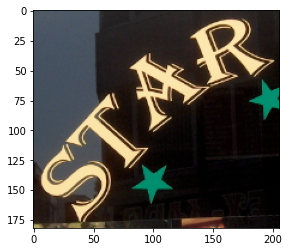

In [4]:
look_img_path('demo/demo_text_recog.jpg')

# 导入OCR模型

In [5]:
from mmocr.utils.ocr import MMOCR

In [6]:
mmocr = MMOCR(det='TextSnake', recog=None,device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


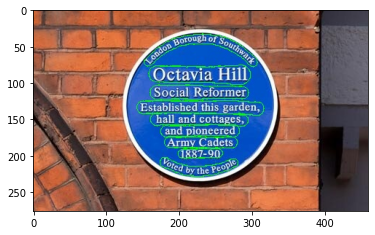

In [7]:
input_path = 'demo/demo_text_det.jpg'
output_path = input_path.split('.')[-2] + '-out.jpg'
result = mmocr.readtext(input_path, output=output_path)
look_img_path(output_path)

In [8]:
# 文本区域个数
len(result[0]['boundary_result'])

9

In [9]:
# 索引为1的区域
len(result[0]['boundary_result'][1])

415

In [10]:
# 列表最后一位为文本区域置信度
result[0]['boundary_result'][0][-1]

0.9489857829677872

# 文字区域打马赛克

第一片文字区域的点坐标：x1, y1, x2, y2, x3, y3,...,xn, yn

In [11]:
result[0]['boundary_result'][0][:10]

[180.700901389122,
 202.125,
 180.32600325345993,
 202.5,
 178.82641071081161,
 202.5,
 178.45151257514954,
 202.875,
 177.70171630382538,
 202.875]

In [13]:
# 第一片文字区域的置信度
result[0]['boundary_result'][0][-1]

0.9489857829677872

# 整理第一片文字的坐标矩阵

In [14]:
point_coords = np.array(result[0]['boundary_result'][0][:-1]).reshape(-1,2)

In [15]:
point_coords.shape

(376, 2)

In [16]:
point_coords[:10]

array([[180.70090139, 202.125     ],
       [180.32600325, 202.5       ],
       [178.82641071, 202.5       ],
       [178.45151258, 202.875     ],
       [177.7017163 , 202.875     ],
       [176.5770219 , 204.        ],
       [176.20212376, 204.        ],
       [176.20212376, 204.375     ],
       [175.07742935, 205.5       ],
       [175.07742935, 206.25      ]])

In [17]:
point_coords = np.array([point_coords], dtype = np.int32)

In [18]:
point_coords.shape

(1, 376, 2)

# 打马赛克

In [19]:
img = cv2.imread(input_path)

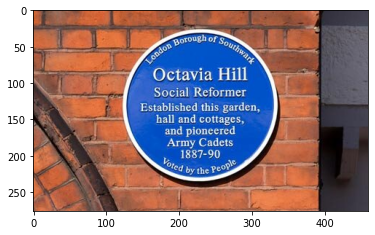

In [20]:
look_img(img)

In [21]:
img.shape

(276, 460, 3)

In [22]:
# 多边形填充
cv2.fillPoly(img, point_coords, (0,255,0))

array([[[ 53, 103, 203],
        [ 56, 105, 203],
        [ 61, 104, 201],
        ...,
        [ 77,  63,  65],
        [ 78,  64,  66],
        [ 78,  64,  66]],

       [[ 60, 109, 211],
        [ 59, 108, 208],
        [ 60, 105, 202],
        ...,
        [ 77,  63,  65],
        [ 78,  64,  66],
        [ 78,  64,  66]],

       [[ 60, 111, 215],
        [ 57, 106, 208],
        [ 56, 102, 203],
        ...,
        [ 78,  64,  66],
        [ 78,  64,  66],
        [ 79,  65,  67]],

       ...,

       [[ 81,  97, 140],
        [ 76,  94, 141],
        [ 74,  96, 154],
        ...,
        [ 74,  63,  66],
        [ 74,  63,  66],
        [ 74,  63,  66]],

       [[ 80,  93, 137],
        [ 81,  97, 144],
        [ 75,  95, 153],
        ...,
        [ 74,  63,  66],
        [ 74,  63,  66],
        [ 74,  63,  66]],

       [[ 68,  81, 125],
        [ 78,  94, 141],
        [ 75,  95, 153],
        ...,
        [ 74,  63,  66],
        [ 74,  63,  66],
        [ 74,  63,  66]]

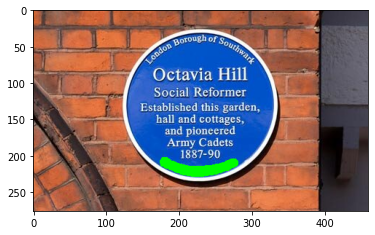

In [23]:
look_img(img)

# 完整马赛克填充

In [24]:
for each in result[0]['boundary_result']: # 遍历每片文字区域
    if each[-1] > 0.5: # 置信度阈值
        point_coords = np.array(each[:-1]).reshape(-1,2)
        point_coords = np.array([point_coords], dtype = np.int32)
        cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充
    else:
        pass

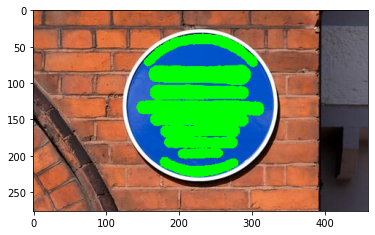

In [25]:
look_img(img)

# 完整代码

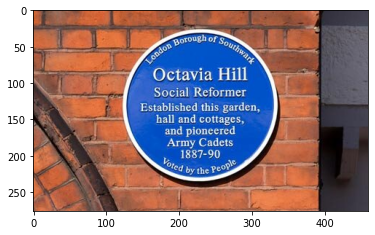

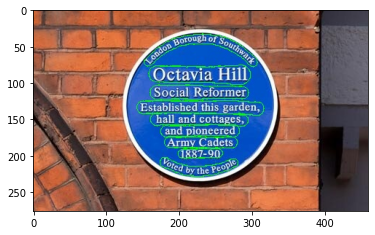

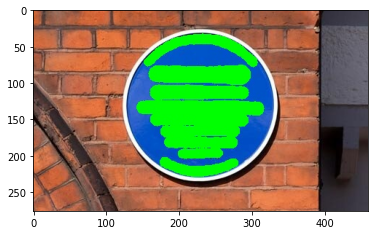

In [26]:
input_path = 'demo/demo_text_det.jpg'
output_path = input_path.split('.')[-2] + '-out.jpg'
mosaic_path = input_path.split('.')[-2] + '-mosaic.jpg'
img = cv2.imread(input_path)
result = mmocr.readtext(img, output=output_path)


for each in result[0]['boundary_result']: # 遍历每个文字区域
    if each[-1] > 0.5: # 置信度阈值
        point_coords = np.array(each[:-1]).reshape(-1,2)
        point_coords = np.array([point_coords], dtype = np.int32)
        cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充
    else:
        print('有一片文字区域置信度为{:.2f}，小于阈值，不打码'.format(each[-1]))
        
cv2.imwrite(mosaic_path, img)
look_img_path(input_path)
look_img_path(output_path)
look_img_path(mosaic_path)

# 封装函数

In [27]:
def mosaic_img(input_path):
    output_path = input_path.split('.')[-2] + '-out.jpg'
    mosaic_path = input_path.split('.')[-2] + '-mosaic.jpg'

    img = cv2.imread(input_path)
    result = mmocr.readtext(img, output=output_path)

    for each in result[0]['boundary_result']: # 遍历每个文字区域
        if each[-1] > 0.2: # 置信度阈值
            point_coords = np.array(each[:-1]).reshape(-1,2)
            point_coords = np.array([point_coords], dtype = np.int32)
            cv2.fillPoly(img, point_coords, (0,255,0)) # 多边形填充
        else:
            print('有一片文字区域置信度为{:.2f}，小于阈值，不打码'.format(each[-1]))

    cv2.imwrite(mosaic_path, img)
    look_img_path(input_path)
    look_img_path(output_path)
    look_img_path(mosaic_path)

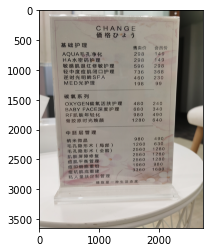

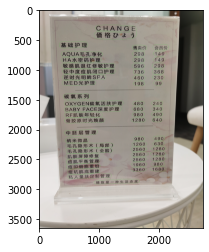

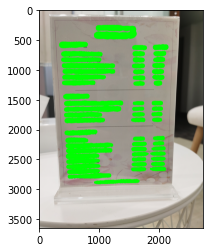

In [28]:
mosaic_img('tutorials/img/1.jpg')